In [8]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt


In [1]:
data = [
    {1: [892.0546875, 616.052490234375, 913.1383666992188, 638.1419677734375]},
    {1: [872.3719482421875, 633.9937133789062, 898.938720703125, 662.757568359375]},
    {1: [857.9866943359375, 644.4781494140625, 884.14697265625, 670.1808471679688]}
]


In [2]:
for x in data:
    print(x[1])

[892.0546875, 616.052490234375, 913.1383666992188, 638.1419677734375]
[872.3719482421875, 633.9937133789062, 898.938720703125, 662.757568359375]
[857.9866943359375, 644.4781494140625, 884.14697265625, 670.1808471679688]


In [9]:
# read pkl file 
with open(r'C:\Users\Debasish Das\Desktop\Tennis Ball Analysis - Copy\tracker_stubs\ball_tracking_stub2.pkl', 'rb') as f:
    ball_positions=pickle.load(f)


In [10]:
ball_positions = [x.get(1,[]) for x in ball_positions]

In [11]:
ball_positions

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [969.0872192382812, 343.1656494140625, 987.1961669921875, 362.9599914550781],
 [962.8866577148438, 367.7557067871094, 979.6495971679688, 387.1570129394531],
 [],
 [],
 [],
 [],
 [608.4818115234375, 811.3634033203125, 619.9937133789062, 823.6783447265625],
 [911.69384765625, 544.5787353515625, 929.4228515625, 563.1177978515625],
 [],
 [],
 [891.86572265625, 615.8201293945312, 913.1912841796875, 638.1378173828125],
 [884.6829223632812, 633.534912109375, 904.6190795898438, 655.0654907226562],
 [872.3809814453125, 634.0924682617188, 898.6392211914062, 662.4036865234375],
 [870.3834228515625, 643.77490234375, 887.0062866210938, 661.779296875],
 [858.1915283203125, 644.484130859375, 883.93798828125, 669.9523315429688],
 [858.1776123046875, 644.4852905273438, 883.9053955078125, 669.94287109375],
 [848.202392578125, 650.2639770507812, 877.4373779296875, 678.5834350585938],
 [],
 [],
 [824.1820678710938, 673.784851

In [12]:
df_ball_positions=pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])
# interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [13]:
df_ball_positions

,x1,y1,x2,y2
0,969.087219,343.165649,987.196167,362.959991
1,969.087219,343.165649,987.196167,362.959991
2,969.087219,343.165649,987.196167,362.959991
3,969.087219,343.165649,987.196167,362.959991
4,969.087219,343.165649,987.196167,362.959991
...,...,...,...,...
924,840.010803,402.534210,856.015686,419.415253
925,840.010803,402.534210,856.015686,419.415253
926,840.010803,402.534210,856.015686,419.415253
927,840.010803,402.534210,856.015686,419.415253


In [14]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

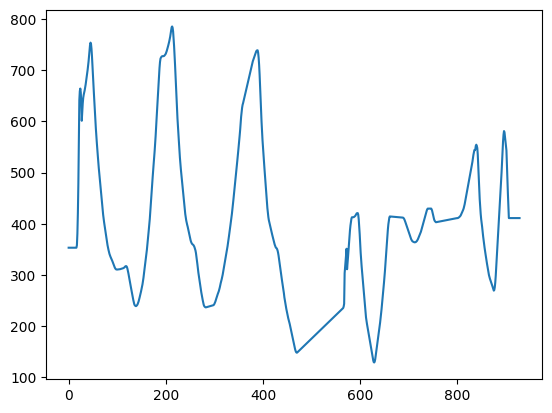

In [15]:
plt.plot(df_ball_positions['mid_y_rolling_mean'])

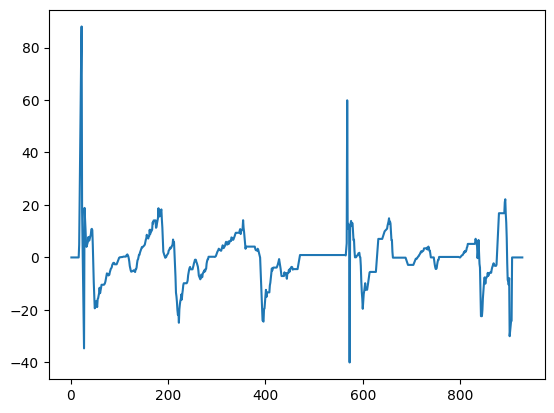

In [16]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

# plot mid_y_rolling_mean
plt.plot(df_ball_positions['delta_y'])

In [ ]:
df_ball_positions['ball_hit']=0
minimum_change_frames_for_hit = 25
for i in range(1,len(df_ball_positions)- int(minimum_change_frames_for_hit*1.2) ):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[i+1] <0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[i+1] >0

    if negative_position_change or positive_position_change:
        change_count = 0 
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[change_frame] <0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[change_frame] >0

            if negative_position_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_position_change and positive_position_change_following_frame:
                change_count+=1
    
        if change_count>minimum_change_frames_for_hit-1:
            # df_ball_positions['ball_hit']loc[i] = 1
            df_ball_positions.loc[i,"ball_hit"]=1

frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

In [ ]:
df_ball_positions[df_ball_positions['ball_hit']==1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,774.863892,716.475403,799.333008,741.907288,729.191345,735.775607,6.591119,1
58,926.161926,242.734592,937.785132,254.336319,248.535455,242.934108,-1.203340,1
95,622.726501,746.912781,643.090576,768.376862,757.644821,774.902753,0.898441,1
131,717.423920,232.109505,728.561401,243.704704,237.907104,236.880272,-0.454651,1
181,1280.040894,706.120398,1295.684692,723.778760,714.949579,726.328151,0.117865,1


In [ ]:
frames_hit=df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

In [ ]:
frames_hit

[11, 58, 95, 131, 181]

## Bounce Frame Number

In [ ]:
df_ball_positions['delta_y'].iloc[40:100]
# i want to see data between the 30 t0 80 frame 


40     0.100846
41     0.472780
42     0.720422
43     0.848304
44     0.976186
45     0.976186
46     1.303938
47    -0.493970
48    -2.291879
49    -4.089787
50    -5.887695
51    -8.560654
52    -9.107952
53    -9.743898
54   -10.379844
55    -9.337531
56    -7.572217
57    -4.432102
58    -1.203340
59     2.025422
60     3.575925
61     4.950726
62     5.836944
63     6.723162
64     7.609380
65    10.390621
66    13.275446
67    13.170027
68    15.201348
69    18.256647
70    17.763544
71    18.323444
72    22.202524
73    23.944864
74    24.663226
75    27.034967
76    25.765350
77    28.051801
78    30.028436
79    28.896442
80    31.925958
81    31.003457
82    25.309733
83    19.925824
84    15.397430
85     6.707526
86     4.602946
87     3.140920
88     1.678894
89     3.527893
90     5.120526
91     6.877560
92     7.992041
93    10.253174
94     9.916077
95     0.898441
96    -8.432132
97   -15.464063
98   -28.367087
99   -39.729791
Name: delta_y, dtype: float64

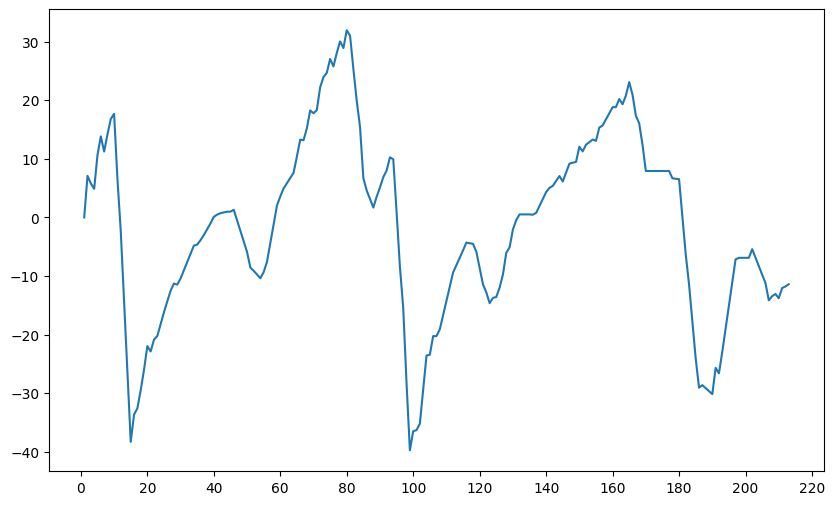

In [ ]:
# ploat of 9*9 matrix
plt.figure(figsize=(10, 6))  # Width = 10 inches, Height = 6 inches
plt.plot(df_ball_positions['delta_y'].index,df_ball_positions['delta_y'])
plt.locator_params(axis='x', nbins=15)
plt.show()



In [ ]:
# hit frames
for i in range(0,len(frames_hit)):
    # print(frames_hit[i])
    # local minima between 2 hit frames
    for i in range(frames_hit[i],frames_hit[i+1]):
        # print(i)
        if df_ball_positions["delta_y"].iloc[i+3] - df_ball_positions['delta_y'].iloc[i] < 2 :
            print(i)
            

            



11
12
13
14
20
34
39
40
41
42
43
44
45
46
47
48
49
50
51
52
73
78
79
80
81
82
83
84
85
86
87
92
93
94
95
96
97
98
115
116
117
118
119
120
121
122
131
132
133
134
135
140
142
143
146
148
150
152
160
161
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180


IndexError: list index out of range

In [ ]:
# Corrected code with proper parentheses
df_ball_positions['local_min'] = (
    (df_ball_positions['delta_y'].shift(-1) < df_ball_positions['delta_y']) & 
    (abs(df_ball_positions['delta_y'] - df_ball_positions['delta_y'].shift(-1)) > 5 )
)

# Display results
df_ball_positions[df_ball_positions['local_min']==True]


,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit,ball_bounce,local_min
10,770.148254,758.911560,787.492188,778.418518,768.665039,729.184488,17.672391,0,0,True
11,774.863892,716.475403,799.333008,741.907288,729.191345,735.775607,6.591119,1,0,True
12,783.510132,680.505249,808.148804,705.306427,692.905838,733.445947,-2.329660,0,0,True
13,792.156372,644.535095,816.964600,668.705566,656.620331,719.152014,-14.293933,0,0,True
14,800.507629,605.050415,825.973572,631.561279,618.305847,693.137680,-26.014334,0,0,True
81,711.129211,693.573161,732.359314,716.879069,705.226115,653.553768,31.003457,0,0,True
82,702.952576,704.758504,724.822205,728.121236,716.439870,678.863501,25.309733,0,0,True
84,687.379333,715.479034,710.771423,739.724579,727.601807,714.186755,15.397430,0,0,True
94,621.927612,785.837402,639.114624,803.805908,794.821655,774.004312,9.916077,0,0,True
95,622.726501,746.912781,643.090576,768.376862,757.644821,774.902753,0.898441,1,0,True


In [ ]:
from scipy.signal import find_peaks
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema

# Find local minima
df_ball_positions['local_min'] = False
minima_indices = argrelextrema(df_ball_positions['delta_y'].values, np.less)[0]
df_ball_positions.loc[minima_indices, 'local_min'] = True
frames_bounce=df_ball_positions[df_ball_positions["local_min"]==True].index.tolist()


In [ ]:
len(frames_bounce)

24

In [ ]:
# Intersection of  hit and Bounce Frame positions
frames_bounce = set(frames_bounce)
frames_hit = set(frames_hit)
frames_bounce.intersection(frames_hit)

set()

In [ ]:
bounce_frames=[42,82,84,117,166,203]

In [ ]:
filtered_bounce_frames = [bounce_frames[0]] + [
    bounce_frames[i] for i in range(1, len(bounce_frames)) if bounce_frames[i] - bounce_frames[i - 1] > 10
]

In [ ]:
filtered_bounce_frames

[42, 82, 117, 166, 203]

In [ ]:
# Original list of points
data = [
    (1713.6034998937052, 77.01246286951536),
    (1768.8157049012584, 511.1910156828617),
    (1819.9495810282942, 209.06898654931004),
    (1753.7870166375044, 509.4550294033404),
    (1810.426572410224, 211.26563447360064),
    (1,1),(1,1)
]

# Converting the list to a set
unique_points = set(data)

# Output the set
print(len(unique_points))


6


In [ ]:
hit_ball=[12,34,56,59]
ball_bounce=[23,35,65,58]

for hit in hit_ball:
    filtered_bounce_frames=[ lambda x : x for x in ball_bounce if abs(x-hit) < 5]
    print(filtered_bounce_frames)
    if len(filtered_bounce_frames)>=1:
        for bounce in filtered_bounce_frames:
            ball_bounce.remove(filtered_bounce_frames)
    

print(ball_bounce)

[]
[<function <lambda> at 0x000002BFFA8D22A0>]


ValueError: list.remove(x): x not in list

In [ ]:
hit_ball = [12, 34, 56, 59]
ball_bounce = [23, 35, 65, 58]

filtered_bounce_ball = [
    bounce for bounce in ball_bounce
    if all(abs(bounce - hit) > 5 for hit in hit_ball)
]

print(filtered_bounce_ball)


[23, 65]
